In [1]:
%pip install prophet
%pip install plotly

  Using cached holidays-0.50-py3-none-any.whl.metadata (23 kB)
  Using cached tqdm-4.66.4-py3-none-any.whl.metadata (57 kB)
  Using cached stanio-0.5.0-py3-none-any.whl.metadata (1.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 8.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.4/94.4 kB 10.6 MB/s eta 0:00:00
Using cached holidays-0.50-py3-none-any.whl (1.0 MB)
Using cached tqdm-4.66.4-py3-none-any.whl (78 kB)
Using cached stanio-0.5.0-py3-none-any.whl (8.0 kB)
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Import de librería
import os
from prophet import Prophet
import pandas as pd

/Users/jorgebarquero/anaconda3/envs/Enae_SeriesTemporales/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
parent_dir = os.path.dirname(os.getcwd())
data = pd.read_excel (parent_dir + '/data/raw/Liberty_RedLogistics/UnifiedData.xlsx', sheet_name='UnifiedData')
data.head()

DUA  Item del DUA  Fecha DUA      Aduana  \
0  005-2022-001495             1 2022-01-03  SANTAMARIA   
1  005-2022-001495             2 2022-01-03  SANTAMARIA   
2  005-2022-001495             3 2022-01-03  SANTAMARIA   
3  005-2022-001495             4 2022-01-03  SANTAMARIA   
4  005-2022-001495             5 2022-01-03  SANTAMARIA   

                  Regimen       Modalidad                         Importador  \
0  IMPORTACION DEFINITIVA  ENTREGA RAPIDA  LIBERTY EXPRESS CORPORATE VC S.A.   
1  IMPORTACION DEFINITIVA  ENTREGA RAPIDA  LIBERTY EXPRESS CORPORATE VC S.A.   
2  IMPORTACION DEFINITIVA  ENTREGA RAPIDA  LIBERTY EXPRESS CORPORATE VC S.A.   
3  IMPORTACION DEFINITIVA  ENTREGA RAPIDA  LIBERTY EXPRESS CORPORATE VC S.A.   
4  IMPORTACION DEFINITIVA  ENTREGA RAPIDA  LIBERTY EXPRESS CORPORATE VC S.A.   

       Proveedor          Marca         Modelo  ... Total Ley 6946 US$  % DAI  \
0  No disponible  No disponible  No disponible  ...               0.43     14   
1  No disponible  No disponible  No disponible  ...               5.61     14   
2  No disponible  No disponible  No disponible  ...               5.76     14   
3  No disponible  No disponible  No disponible  ...               3.58      9   
4  No disponible  No disponible  No disponible  ...               0.64     14   

   Total DAI US$ COSTO por PROCOMER US$ % S.C Total SC US$  \
0           6.04                      3     0         0.00   
1          78.49                      0    10        63.91   
2          80.65                      0     0         0.00   
3          32.23                      0     0         0.00   
4           8.94                      0     0         0.00   

  Otros impuestos US$ Total de Impuestos  Proporción Pr FOB / impuestos  \
0                0.11              16.03                       0.485758   
1                0.00             240.13                       0.440048   
2                0.00             172.53                       0.307551   
3                0.00              87.02                       0.252232   
4                0.00              19.12                       0.357450   

  Proporción VA / impuestos  
0                  0.371409  
1                  0.428314  
2                  0.299490  
3                  0.243018  
4                  0.299499  

[5 rows x 52 columns]

In [19]:
grouped_data = data.groupby('Fecha DUA')['Valor CIF US$'].sum()
print(grouped_data)



Fecha DUA
2021-01-04     7226.16
2021-01-05    16784.84
2021-01-06    12538.98
2021-01-07     6144.09
2021-01-08     6306.10
                ...   
2023-12-21    22466.18
2023-12-22    12445.29
2023-12-23    10657.64
2023-12-26    18873.58
2023-12-28    20742.06
Name: Valor CIF US$, Length: 604, dtype: float64


In [20]:
grouped_data = grouped_data.rename({'Fecha DUA': 'Fecha DUA', 'Valor CIF US$': 'Valor CIF US$'}, axis=1)


ValueError: No axis named 1 for object type Series

In [16]:
df_prophet = data[['Fecha DUA', 'Valor CIF US$']].rename(columns={'Fecha DUA': 'ds', 'Valor CIF US$': 'y'})

KeyError: "None of [Index(['Fecha DUA', 'Valor CIF US$'], dtype='object', name='Fecha DUA')] are in the [index]"

CodSA            2508  2513  2526  3006  3402  3405  3406  3407  3506  3701  \
DUA                                                                           
005-2021-000324     0     0     0     0     0     0     0     0     0     0   
005-2021-000341     0     0     0     0     0     0     0     0     0     0   
005-2021-002548     0     0     0     0     0     0     0     0     0     0   
005-2021-002659     0     0     0     0     0     0     0     0     0     0   
005-2021-002660     0     0     0     0     0     0     0     0     0     0   

CodSA            ...  9613  9614  9615  9616  9617  9618  9619  9620  9701  \
DUA              ...                                                         
005-2021-000324  ...     0     0     0     0     1     0     0     1     0   
005-2021-000341  ...     0     0     0     0     0     0     0     1     0   
005-2021-002548  ...     0     0     0     0     0     0     0     0     0   
005-2021-002659  ...     0     0     0     0     0     0     0     0     0   
005-2021-002660  ...     0     0     0     0     0     0     0     0     0   

CodSA            9706  
DUA                    
005-2021-000324     0  
005-2021-000341     0  
005-2021-002548     0  
005-2021-002659     0  
005-2021-002660     0  

[5 rows x 457 columns]

In [3]:
# Python
# df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
# df.head()

ds         y
0  2007-12-10  9.590761
1  2007-12-11  8.519590
2  2007-12-12  8.183677
3  2007-12-13  8.072467
4  2007-12-14  7.893572

In [6]:
# Python
m = Prophet()
m.fit(df_prophet)



11:42:18 - cmdstanpy - INFO - Chain [1] start processing
11:42:34 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
future = m.make_future_dataframe(periods=365)
future.tail()

ds
964 2024-12-23
965 2024-12-24
966 2024-12-25
967 2024-12-26
968 2024-12-27

In [10]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()



ds       yhat  yhat_lower  yhat_upper
964 2024-12-23  85.572020  -48.396422  220.868393
965 2024-12-24  74.420853  -52.732899  206.725499
966 2024-12-25  80.505684  -54.095685  225.291768
967 2024-12-26  88.469864  -41.152485  227.926077
968 2024-12-27  87.965745  -45.664120  229.843159

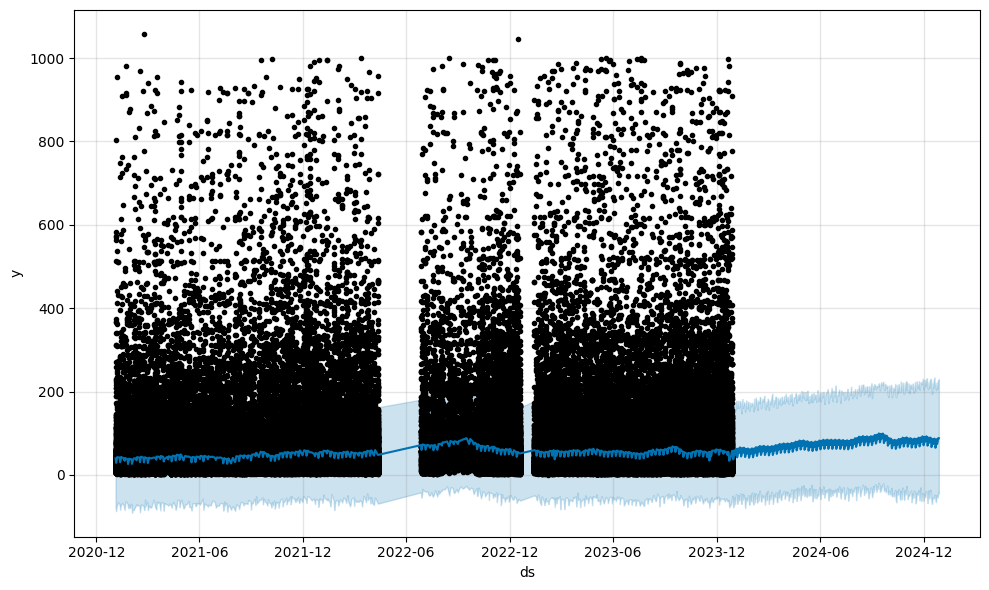

In [11]:
fig1 = m.plot(forecast)



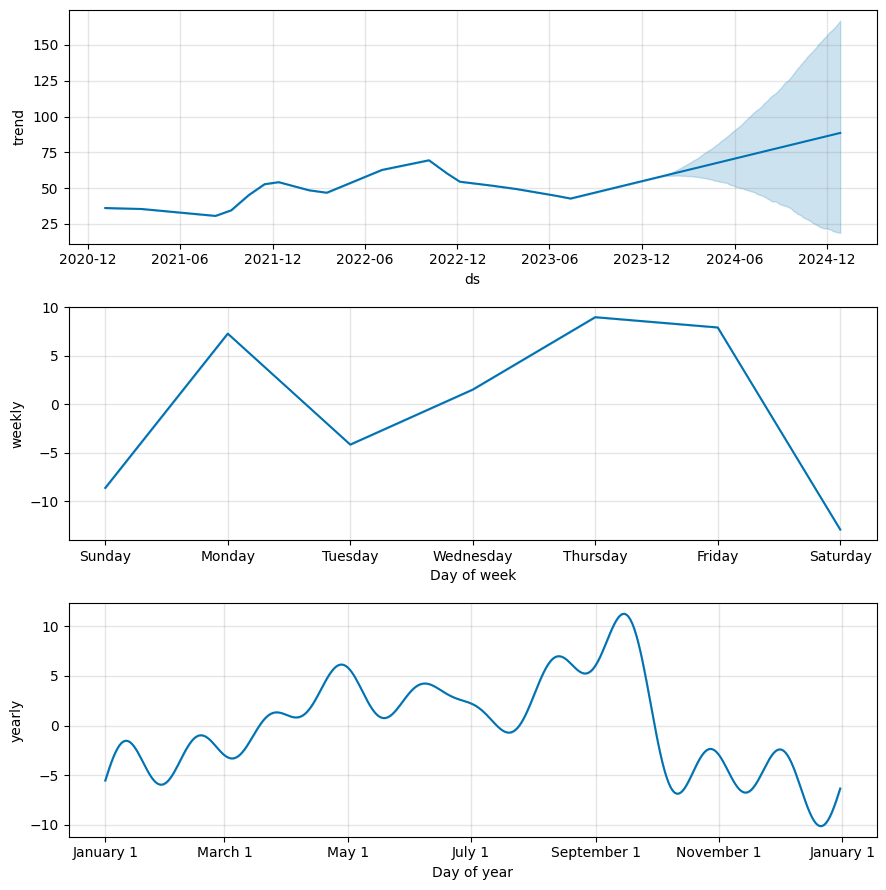

In [12]:
fig2 = m.plot_components(forecast)



In [13]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [14]:
plot_components_plotly(m, forecast)

